In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'data/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 20022 files belonging to 13 classes.


In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'data/val',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256,256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 2300 files belonging to 13 classes.


In [4]:
cnn = tf.keras.models.Sequential()

In [5]:
import tensorflow as tf

# Define the Sequential model
cnn = tf.keras.Sequential()

# Add the input layer using Input object
cnn.add(tf.keras.Input(shape=[256,256,3]))

# Add the convolutional layers
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))

# Add the pooling layer
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))


In [6]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [10]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [11]:
cnn.add(tf.keras.layers.Flatten())

In [12]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [13]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [14]:
cnn.add(tf.keras.layers.Dense(13,activation='softmax'))

In [15]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
            loss='categorical_crossentropy',
            metrics=['accuracy'])

In [16]:
cnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 254, 254, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 127, 127, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 125, 125, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 62, 62, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 30, 30, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 14, 14, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 12, 12, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │    27,649,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 13)             │        19,513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,381,237 (123.52 MB)

 Trainable params: 32,381,237 (123.52 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
626/626 ━━━━━━━━━━━━━━━━━━━━ 5462s 9s/step - accuracy: 0.5312 - loss: 1.4300 - val_accuracy: 0.9183 - val_loss: 0.2505
Epoch 2/10
626/626 ━━━━━━━━━━━━━━━━━━━━ 3355s 5s/step - accuracy: 0.8942 - loss: 0.3121 - val_accuracy: 0.9261 - val_loss: 0.1983
Epoch 3/10
626/626 ━━━━━━━━━━━━━━━━━━━━ 7107s 11s/step - accuracy: 0.9415 - loss: 0.1662 - val_accuracy: 0.9552 - val_loss: 0.1337
Epoch 4/10
626/626 ━━━━━━━━━━━━━━━━━━━━ 7393s 12s/step - accuracy: 0.9585 - loss: 0.1207 - val_accuracy: 0.9561 - val_loss: 0.1325
Epoch 5/10
626/626 ━━━━━━━━━━━━━━━━━━━━ 5663s 9s/step - accuracy: 0.9707 - loss: 0.0881 - val_accuracy: 0.9543 - val_loss: 0.1466
Epoch 6/10
626/626 ━━━━━━━━━━━━━━━━━━━━ 4040s 6s/step - accuracy: 0.9739 - loss: 0.0759 - val_accuracy: 0.9613 - val_loss: 0.1453
Epoch 7/10
626/626 ━━━━━━━━━━━━━━━━━━━━ 3792s 6s/step - accuracy: 0.9785 - loss: 0.0619 - val_accuracy: 0.9696 - val_loss: 0.1214
Epoch 8/10
626/626 ━━━━━━━━━━━━━━━━━━━━ 8473s 14s/step - accuracy: 0.9835 - loss: 0.0449

In [18]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)i
print('Training accuracy:', train_acc)

626/626 ━━━━━━━━━━━━━━━━━━━━ 2096s 3s/step - accuracy: 0.9910 - loss: 0.0241
Training accuracy: 0.9926081299781799


In [19]:
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

72/72 ━━━━━━━━━━━━━━━━━━━━ 238s 3s/step - accuracy: 0.9652 - loss: 0.0994
Validation accuracy: 0.9691304564476013


In [20]:
cnn.save('models/2227kooo.keras')

In [21]:
training_history.history #Return Dictionary of history

{'accuracy': [0.7145639657974243,
  0.913245439529419,
  0.9473079442977905,
  0.9623414278030396,
  0.9703326225280762,
  0.9761762022972107,
  0.9800219535827637,
  0.9827190041542053,
  0.984017550945282,
  0.986864447593689],
 'loss': [0.8373187780380249,
  0.249953031539917,
  0.1512133777141571,
  0.10619494318962097,
  0.08589185029268265,
  0.06972911208868027,
  0.055720727890729904,
  0.04705987870693207,
  0.046524908393621445,
  0.03908532112836838],
 'val_accuracy': [0.9182608723640442,
  0.926086962223053,
  0.9552174210548401,
  0.9560869336128235,
  0.9543478488922119,
  0.9613043665885925,
  0.969565212726593,
  0.9591304063796997,
  0.9634782671928406,
  0.9691304564476013],
 'val_loss': [0.25046104192733765,
  0.1983402520418167,
  0.13365869224071503,
  0.13253936171531677,
  0.14657780528068542,
  0.14532282948493958,
  0.12138020247220993,
  0.163155198097229,
  0.13273008167743683,
  0.10495911538600922]}

In [22]:
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [23]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


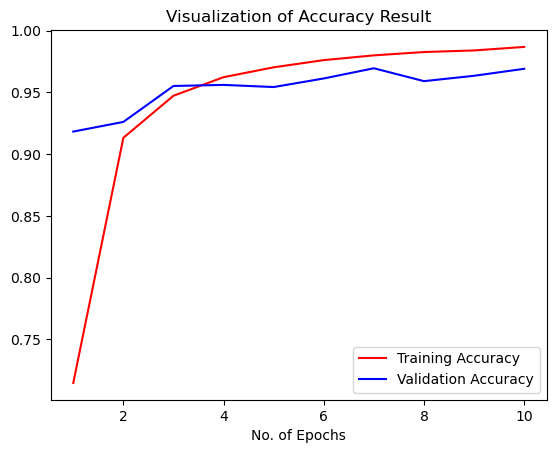

In [24]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

In [25]:
class_name = validation_set.class_names

In [26]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'data/val',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(256,256),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 2300 files belonging to 13 classes.


In [27]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

2300/2300 ━━━━━━━━━━━━━━━━━━━━ 291s 125ms/step


In [28]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [29]:

Y_true

<tf.Tensor: shape=(2300,), dtype=int64, numpy=array([ 0,  0,  0, ..., 12, 12, 12], dtype=int64)>

In [30]:
predicted_categories

<tf.Tensor: shape=(2300,), dtype=int64, numpy=array([ 0,  0,  0, ..., 12, 12, 12], dtype=int64)>

In [31]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [32]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.86      0.97      0.91       140
                       Corn_(maize)___Common_rust_       0.99      0.99      0.99       163
               Corn_(maize)___Northern_Leaf_Blight       0.97      0.88      0.93       172
                            Corn_(maize)___healthy       1.00      0.97      0.99       185
                                 Grape___Black_rot       0.99      0.97      0.98       188
                      Grape___Esca_(Black_Measles)       0.99      1.00      0.99       176
        Grape___Leaf_blight_(Isariopsis_Leaf_Spot)       0.99      0.99      0.99       172
                                   Grape___healthy       0.99      1.00      1.00       169
                     Pepper,_bell___Bacterial_spot       0.96      0.98      0.97       191
                            Pepper,_bell___healthy       0.92      0.95      0.